In [2]:
# Load Python Libraries
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import glob
import numpy as np
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [14]:
# Specify paths to IR data and terrain data
IRpath = '/avalanche/pmarin/INCUS/MERGIR/CACTI/'
Tfile = '/avalanche/pmarin/INCUS/MERGIR/elev.0.25-deg.nc'
files = sorted(glob.glob(IRpath+'*.nc4'))

# Specicy path for saving figures
savepath = '/avalanche/pmarin/INCUS/MERGIR/CACTI/Plots/'

In [15]:
# Load Terrain Data
ter_data = Dataset(Tfile)
print(ter_data['data'])
print(ter_data['lat'])

<class 'netCDF4._netCDF4.Variable'>
int16 data(time, lat, lon)
    long_name: meters, from 5-min data
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: 32767
    units: meters, from 5-min data
unlimited dimensions: time
current shape = (1, 720, 1440)
filling on, default _FillValue of -32767 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    title: Latitude
    units: degrees_north
    scale_factor: 1.0
    add_offset: 0.0
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    BeginDate: 2018-12-13
    BeginTime: 14:00:00.000Z
    EndDate: 2018-12-13
    EndTime: 14:59:59.999Z
    FileHeader: StartGranuleDateTime=2018-12-13T14:00:00.000Z;
StopGranuleDateTime=2018-12-13T14:59:59.999Z
    InputPointer: merg_2018121314_4km-pixel
    title: NCEP/CPC 4km Global (60N - 60S) IR Dataset
    ProductionTime: 2018-12-15T00:14:11.077Z
    history: 2022-11-03 20:23:19 GMT Hyrax-1.16.3 https://disc2.gesdisc.eosdis.nasa.gov/opendap/MERGED_IR/GPM_MERGIR.1/2018/347/merg_2018121314_4km-pixel.nc4.nc4?Tb[0:1][549:1099][3023:3573],time,lat[549:1099],lon[3023:3573]
    dimensions(sizes): time(2), lat(551), lon(551)
    variables(dimensions): float32 Tb(time, lat, lon), float32 lat(lat), float32 lon(lon), float64 time(time)
    groups: 
[17878.58333333 17878.60416667]
Saving /avalanche/pmarin/INCUS/MERGIR/CACTI/Plots/MERGIR_Tb_2018121314_Lon_-67-60_Lat_-36-28.png


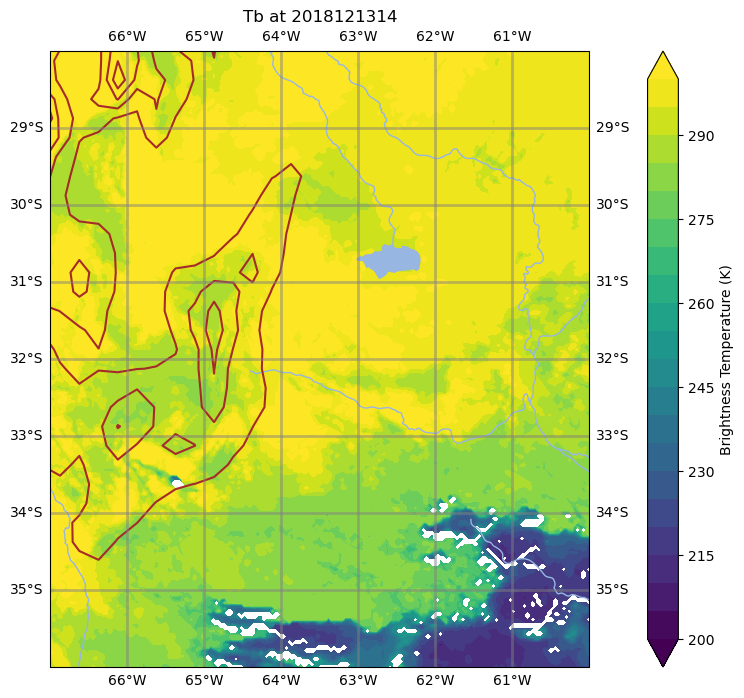

In [21]:
# Specify lat/lon bounds
xlims = [-67,-60]
ylims = [-36,-28]

# Specify contour levels for different variables
lvls = np.arange(200,300.1,5) # Tb levels, K
tlvls = np.arange(500,5001,500) # terrain levels, m

i = 0
# Loop throgh files and plot Tb and terrain on a map
for f in np.arange(14,15,1):
#for f in np.arange(13,14):
    fig,ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()},figsize=[15,8])
    
    # Read in brightness temperature data
    data = Dataset(files[f])
    print(data)
    Tb = data['Tb'][:]
    lat = data['lat'][:]
    lon = data['lon'][:]
    time = data['time'][:]
    print(time)
    # Get date string from filename
    datestr = os.path.basename(files[f])[5:15] 

    ax.add_feature(cfeature.COASTLINE) # Add coastlines
    ax.add_feature(cfeature.BORDERS) # Add boarders 
    ax.add_feature(cfeature.RIVERS) # Add Rivers
    ax.add_feature(cfeature.LAKES) # Add Rivers
    
    # Contourf brightness tempeartures [0 value in first axis specifies grabbing either XX00 (HHMM) data, as opposed to data on the on the XX30 (HHMM) data
    a = ax.contourf(lon,lat,Tb[0,:,:],levels=lvls,extend='both',transform = ccrs.PlateCarree())

    # Contour terrain data
    ax.contour(ter_data['lon'][:],ter_data['lat'][:],ter_data['data'][0,:,:],levels=tlvls,colors='brown',transform = ccrs.PlateCarree())
    
    
    # Add grid lines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='-')

    # Specify title and lat/lon bounds
    ax.set_title('Tb at '+datestr)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Set x and y axis limits
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

    # Plot colorbar
    cbar = plt.colorbar(a,ax=ax)        
    cbar.ax.set_ylabel('Brightness Temperature (K)')
    
    #Create filename for saving
    savename = 'MERGIR_Tb_'+datestr+'_'+'Lon_'+str(xlims[0])+str(xlims[1])+'_Lat_'+str(ylims[0])+str(ylims[1])+'.png'
    # Save Figure
    print('Saving '+savepath+savename)
    #plt.savefig(savepath+savename)

    data.close() # Close netcdf file
    #plt.close(fig) # Close figure